# Predicting World Series Winners
** Fall 2016 **
** Jack Limongelli (jal839@stern.nyu.edu)**


## Introduction

Baseball is America's pasttime. It began in 1846 when the Carwright Knickerbockers lost to the New York Baseball Club in Hoboken, New Jersey. Fast foward eighty-one years, the 1927 Yankees capture the hearts of millions as they win the team's second World Series title and cement themselves as the single greatest team in the history of baseball. Figures like Babe Ruth and Lou Gehrig become popular culture icons, removing baseball from its wealthy-aristocratic origins and thrusting it to the masses. The game has evolved greatly since that historic year. Top tier players are now paid up to $30 million a year in the hope that they will help capture the Commissioner's Trophy. That being said, in 112 total World Series, six teams have managed to win 62 percent of championships and one team, the New York Yankees, have one 24 percent. The following question arises: Is there a formula for winning? This project attempts to answer that question.


## Winning 

There are two sides of baseball: hitting and pitching. Obviously, a team can't win games without scoring runs, but the oldest saying is that "defense wins championships." I will consider a teams ranking, relative to the other teams, in runs scored and runs allowed. Extending from those two categories, I will look at the team's regular season record as a percentage of total games won in order to account for the changing regular season length throughout history. Because these three categories are inhernently fundamental to the winning formula, I will also include the payroll of each team and the number of years since the team's previous World Series win. While the latter may not be as infomative historically bad teams, it may offer insight into the six teams mentioned above. 

In [757]:
# Packages
import pandas as pd
import matplotlib.pyplot as plt


I importated pandas in order to read the excel spreadsheets that contain my data. Matplotlib will be used to create graphs, charts, and any other figure that helps describe my data. 

## Data

I collected my data from the following sources: http://www.baseball-reference.com, http://www.thebaseballcube.com/extras/payrolls/, http://www.espn.com/mlb/worldseries/history/winners. The first championship offically called the World Series was held in 1903 so that is my starting year. Unforunately, data regarding pay-roll only began to be tracked in 1988. However, it may still be useful considering the game today is more heavily based on signing free-agents rather than developing young talent as it was in the past. Because many teams have been added throughout the years, many teams will have either "0" or "NaN" for certain years.

In [758]:
#import wins
wins = '/Users/Jack/Desktop/Final/Wins.csv'
WinsTable = pd.read_csv(wins)
WinsTable

,Year,Winner,G,ARI,ATL,BAL,BOS,CHC,CHW,CIN,...,PIT,SDP,SFG,SEA,STL,TBD,TEX,TOR,WSN,None
0,1903,BOS,140,0,41,46,65,59,43,53,...,65,0,60,0,31,0,0,0,0,0
1,1904,None,154,0,36,42,62,60,58,57,...,56,0,69,0,49,0,0,0,0,0
2,1905,SFG,154,0,33,35,51,60,60,51,...,62,0,68,0,38,0,0,0,0,0
3,1906,CHW,154,0,32,49,32,75,60,42,...,60,0,62,0,34,0,0,0,0,0
4,1907,CHC,154,0,38,45,38,69,56,43,...,59,0,53,0,34,0,0,0,0,0
5,1908,CHC,154,0,41,54,49,64,57,47,...,64,0,64,0,32,0,0,0,0,0
6,1909,PIT,153,0,29,40,58,68,51,50,...,72,0,60,0,35,0,0,0,0,0
7,1910,OAK,154,0,34,31,53,68,44,49,...,56,0,59,0,41,0,0,0,0,0
8,1911,OAK,154,0,29,29,51,60,50,45,...,55,0,64,0,49,0,0,0,0,0
9,1912,BOS,154,0,34,34,68,59,51,49,...,60,0,67,0,41,0,0,0,0,0


In [759]:
#import Runs Against
RunsAgainst = '/Users/Jack/Desktop/Final/Runs Against.csv'
RunsAgainstTable = pd.read_csv(RunsAgainst)
RunsAgainstTable


,Year,Winner,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,...,PIT,SDP,SFG,SEA,STL,TBD,TEX,TOR,WSN,None
0,1903,BOS,NaN,6,3,1,2,7,4,6,...,3,NaN,1,NaN,8,NaN,NaN,NaN,NaN,0
1,1904,None,NaN,7,6,1,2,2,3,2,...,4,NaN,1,NaN,5,NaN,NaN,NaN,NaN,0
2,1905,SFG,NaN,6,6,3,1,1,5,4,...,3,NaN,2,NaN,7,NaN,NaN,NaN,NaN,0
3,1906,CHW,NaN,8,3,8,1,1,5,2,...,2,NaN,3,NaN,6,NaN,NaN,NaN,NaN,0
4,1907,CHC,NaN,8,5,6,1,1,5,3,...,3,NaN,3,NaN,7,NaN,NaN,NaN,NaN,0
5,1908,CHC,NaN,7,3,4,3,2,6,1,...,4,NaN,2,NaN,8,NaN,NaN,NaN,NaN,0
6,1909,PIT,NaN,7,6,5,1,2,5,4,...,2,NaN,4,NaN,8,NaN,NaN,NaN,NaN,0
7,1910,OAK,NaN,7,8,5,1,2,6,7,...,3,NaN,2,NaN,8,NaN,NaN,NaN,NaN,0
8,1911,OAK,NaN,8,8,3,3,2,6,4,...,2,NaN,1,NaN,7,NaN,NaN,NaN,NaN,0
9,1912,BOS,NaN,8,6,1,3,3,5,5,...,1,NaN,2,NaN,7,NaN,NaN,NaN,NaN,0


In [760]:
#import Runs 
Runs = '/Users/Jack/Desktop/Final/Runs.csv'
RunsTable = pd.read_csv(Runs)
RunsTable


,Year,Winner,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,...,PIT,SDP,SFG,SEA,STL,TBD,TEX,TOR,WSN,None
0,1903,BOS,NaN,7,7,1,4,6,2,2,...,1,NaN,3,NaN,8,NaN,NaN,NaN,NaN,0
1,1904,None,NaN,8,7,2,5,3,2,1,...,3,NaN,1,NaN,4,NaN,NaN,NaN,NaN,0
2,1905,SFG,NaN,8,7,4,5,2,2,5,...,4,NaN,1,NaN,6,NaN,NaN,NaN,NaN,0
3,1906,CHW,NaN,8,5,8,1,3,4,1,...,3,NaN,2,NaN,7,NaN,NaN,NaN,NaN,0
4,1907,CHC,NaN,6,5,8,2,3,4,6,...,1,NaN,2,NaN,8,NaN,NaN,NaN,NaN,0
5,1908,CHC,NaN,4,4,3,2,5,6,2,...,3,NaN,1,NaN,8,NaN,NaN,NaN,NaN,0
6,1909,PIT,NaN,8,7,3,2,6,4,5,...,1,NaN,3,NaN,5,NaN,NaN,NaN,NaN,0
7,1910,OAK,NaN,8,8,3,2,7,6,5,...,4,NaN,1,NaN,5,NaN,NaN,NaN,NaN,0
8,1911,OAK,NaN,4,8,6,1,3,5,4,...,3,NaN,2,NaN,6,NaN,NaN,NaN,NaN,0
9,1912,BOS,NaN,4,8,1,2,6,7,5,...,3,NaN,1,NaN,6,NaN,NaN,NaN,NaN,0


In [761]:
#import Payroll
Payroll = '/Users/Jack/Desktop/Final/Payroll.csv'
PayrollTable = pd.read_csv(Payroll)
PayrollTable
# Payroll data is in % of league average

,Year,Winner,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,...,SDP,SFG,SEA,STL,TBD,TEX,TOR,WSN,None,Unnamed: 33
0,1988.0,LAD,0.0,89.0,89.0,0.0,110.0,53.0,75.0,70.0,...,88.0,109.0,59.0,125.0,0.0,54.0,104.0,79.0,0.0,11.17
1,1989.0,OAK,0.0,71.0,61.0,116.0,76.0,57.0,83.0,67.0,...,98.0,105.0,71.0,116.0,0.0,80.0,120.0,92.0,0.0,13.38
2,1990.0,CIN,0.0,77.0,58.0,107.0,83.0,55.0,85.0,87.0,...,107.0,120.0,74.0,120.0,0.0,87.0,106.0,96.0,0.0,17.38
3,1991.0,MIN,0.0,86.0,62.0,88.0,113.0,71.0,107.0,77.0,...,95.0,130.0,68.0,90.0,0.0,93.0,116.0,88.0,0.0,23.77
4,1992.0,TOR,0.0,111.0,71.0,110.0,98.0,95.0,118.0,28.0,...,92.0,111.0,75.0,90.0,0.0,100.0,147.0,53.0,0.0,29.78
5,1993.0,TOR,0.0,124.0,87.0,138.0,124.0,112.0,139.0,51.0,...,80.0,112.0,103.0,73.0,0.0,116.0,149.0,48.0,0.0,30.78
6,1994.0,None,0.0,128.0,119.0,117.0,113.0,121.0,126.0,90.0,...,43.0,127.0,88.0,92.0,0.0,102.0,133.0,60.0,0.0,31.63
7,1995.0,ATL,0.0,142.0,129.0,114.0,102.0,125.0,117.0,111.0,...,82.0,110.0,108.0,97.0,0.0,102.0,157.0,38.0,0.0,31.78
8,1996.0,NYY,0.0,150.0,154.0,91.0,98.0,133.0,129.0,144.0,...,86.0,110.0,124.0,123.0,0.0,114.0,90.0,49.0,0.0,31.58
9,1997.0,FLA,0.0,134.0,145.0,105.0,105.0,144.0,115.0,143.0,...,92.0,89.0,105.0,117.0,0.0,133.0,121.0,49.0,0.0,37.79


In [762]:
#import Last WS
LastWS = '/Users/Jack/Desktop/Final/Last WS.csv'
LastWSTable = pd.read_csv(LastWS)
LastWSTable



,Year,Winner,ARI,ATL,BAL,BOS,CHC,CHW,CIN,CLE,...,PIT,SDP,SFG,SEA,STL,TBD,TEX,TOR,WSN,None
0,1903.0,BOS,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1904.0,None,0,1,1,0,1,1,1,1,...,1,0,1,0,1,0,0,0,0,0
2,1905.0,SFG,0,1,1,0,1,1,1,1,...,1,0,1,0,1,0,0,0,0,0
3,1906.0,CHW,0,2,2,1,2,2,2,2,...,2,0,0,0,2,0,0,0,0,0
4,1907.0,CHC,0,3,3,2,3,0,3,3,...,3,0,1,0,3,0,0,0,0,0
5,1908.0,CHC,0,4,4,3,0,1,4,4,...,4,0,2,0,4,0,0,0,0,0
6,1909.0,PIT,0,5,5,4,0,2,5,5,...,5,0,3,0,5,0,0,0,0,0
7,1910.0,OAK,0,6,6,5,1,3,6,6,...,0,0,4,0,6,0,0,0,0,0
8,1911.0,OAK,0,7,7,6,2,4,7,7,...,1,0,5,0,7,0,0,0,0,0
9,1912.0,BOS,0,8,8,7,3,5,8,8,...,2,0,6,0,8,0,0,0,0,0


## Create Lists for Graphs 

Because we are only concerned with World Series winners, we need to remove the data from each table that does not to belong to the winner of that season. 

In [763]:
# Create new dataframe with just the Year and Winner columns from the original
RunsTableWinner = RunsTable[['Year','Winner']] 
# Convert data frame to a list of just the names of the teams that won each world series
RunsTableWinner2 = (RunsTableWinner.loc[0:113, 'Winner'])
RunsTableWinner3 = list(RunsTableWinner2)
# Locate and store the value corresponding to each winner for a given year. 
# A loop makes the process much easier given the 113 year.
RunsTableWinner4 = []
for y in range(0,114):
    RunsTableWinner4.append(RunsTable.loc[y,RunsTableWinner3[y]])
# When the loop data was stored in RunsTableWinner4, the string was repeated several times.  
# To erase the excess data, just the first 115 entries were stored in RunsTableWinner5.
RunsTableWinner5 = RunsTableWinner4[0:114]
# Erase years when the value was 0: no world series occured. 
# This occured in 1904 and 1994 due to business disaggrements between the American League and Naitonal League and 
# a players strike, respectively. 
RunsTableWinner6 = [x for x in RunsTableWinner5 if x != 0]
print(RunsTableWinner6)
# The following cells are the exact same process but for the other data sets. 
# All explanations and code are the exact same. Only the names of variables will change.

[1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 2, 3, 6, 1, 4, 2, 1, 1, 3, 3, 5, 1, 1, 1, 1, 2, 2, 2, 1, 4, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 3, 2, 2, 2, 2, 1, 3, 1, 1, 1, 1, 3, 1, 2, 1, 6, 2, 8, 4, 2, 1, 9.0, 2, 1, 2, 1, 3, 1, 1, 4, 4, 1, 2, 4, 5, 7, 1, 13.0, 1.0, 8, 6, 4, 5, 4, 2.0, 2.0, 9, 9, 8.0, 1, 3, 6, 3.0, 4.0, 8.0, 1, 9, 6, 3, 2, 1, 9, 1, 6, 1, 5, 6.0, 2]


In [764]:
RunsAgainstTableWinner = RunsAgainstTable[['Year','Winner']] 
RunsAgainstTableWinner2 = (RunsAgainstTableWinner.loc[0:113, 'Winner'])
RunsAgainstTableWinner3 = list(RunsAgainstTableWinner2)
RunsAgainstTableWinner4 = []
for y in range(0,114):
    RunsAgainstTableWinner4.append(RunsAgainstTable.loc[y,RunsAgainstTableWinner3[y]])
RunsAgainstTableWinner5 = RunsAgainstTableWinner4[0:114]
RunsAgainstTableWinner6 = [x for x in RunsAgainstTableWinner5 if x != 0]
print(RunsAgainstTableWinner6)


[1, 2, 1, 1, 3, 2, 1, 1, 1, 4, 3, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 3, 4, 1, 2, 1, 2, 2, 2, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1, 7, 1, 10, 2, 1, 2.0, 9, 5, 2, 3, 1, 3, 5, 1, 1, 3, 5, 2, 1, 10, 1, 2.0, 2.0, 9, 2, 1, 1, 3, 8.0, 5.0, 1, 3, 4.0, 1, 2, 4, 2.0, 1.0, 6.0, 4, 3, 5, 1, 3, 6, 2, 9, 6, 6, 6, 3.0, 1]


In [765]:
WinsTableWinner = WinsTable[['Year','Winner']] 
WinsTableWinner2 = (WinsTableWinner.loc[0:113, 'Winner'])
WinsTableWinner3 = list(WinsTableWinner2)
WinsTableWinner4 = []
for y in range(0,114):
    WinsTableWinner4.append(WinsTable.loc[y,WinsTableWinner3[y]])
WinsTableWinner5 = WinsTableWinner4[0:114]
WinsTableWinner6 = [x for x in WinsTableWinner5 if x != 0]
print(WinsTableWinner6)



[65, 68, 60, 69, 64, 72, 66, 66, 68, 62, 61, 66, 59, 65, 58, 69, 64, 61, 60, 64, 60, 62, 58, 71, 66, 68, 66, 66, 69, 59, 62, 60, 66, 66, 64, 69, 65, 66, 69, 64, 68, 57, 63, 63, 63, 63, 64, 62, 62, 64, 63, 64, 63, 62, 60, 56, 62, 67, 58, 61, 57, 60, 44, 62, 64, 62, 54, 60, 60, 58, 56, 67, 63, 62, 61, 60, 56, 57, 57, 48, 64, 56, 67, 52, 58, 61, 56, 59, 59, 59, 62, 57, 57, 70, 60, 54, 57, 61, 56, 60, 61, 51, 59, 56, 63, 57, 56, 58, 60, 54, 59, 64]


In [766]:
PayrollTableWinner = PayrollTable[['Year','Winner']] 
PayrollTableWinner2 = (PayrollTableWinner.loc[0:113, 'Winner'])
PayrollTableWinner3 = list(PayrollTableWinner2)
# The range is smaller because the only goes back to 1988
PayrollTableWinner4 = []
for y in range(0,28):
    PayrollTableWinner4.append(PayrollTable.loc[y,PayrollTableWinner3[y]])
PayrollTableWinner5 = PayrollTableWinner4[0:28]
PayrollTableWinner6 = [x for x in PayrollTableWinner5 if x != 0]
print(PayrollTableWinner6)


[138.0, 109.0, 85.0, 94.0, 147.0, 149.0, 142.0, 165.0, 126.0, 158.0, 186.0, 165.0, 130.0, 91.0, 69.0, 184.0, 103.0, 115.0, 173.0, 110.0, 228.0, 107.0, 114.0, 84.0, 150.0, 134.0, 93.0]


In [767]:
LastWSTableWinner = LastWSTable[['Year','Winner']] 
LastWSTableWinner2 = (LastWSTableWinner.loc[0:113, 'Winner'])
LastWSTableWinner3 = list(LastWSTableWinner2)
LastWSTableWinner4 = []
for y in range(0,114):
    LastWSTableWinner4.append(LastWSTable.loc[y,LastWSTableWinner3[y]])
LastWSTableWinner5 = LastWSTableWinner4[0:114]
# To remove the 1904 and 1994 values with no winner I could not just delete zero values because there are many years
# where the same team won consequtively: the second year would have a value of zero years since the teams last win.
# I created 3 individual lists, which excluded 1904 and 1994 and then combined them into one list
a = LastWSTableWinner5[0:1]
b = LastWSTableWinner5[2:91]
c = LastWSTableWinner5[92:114]
LastWSTableWinner6 = a + b + c


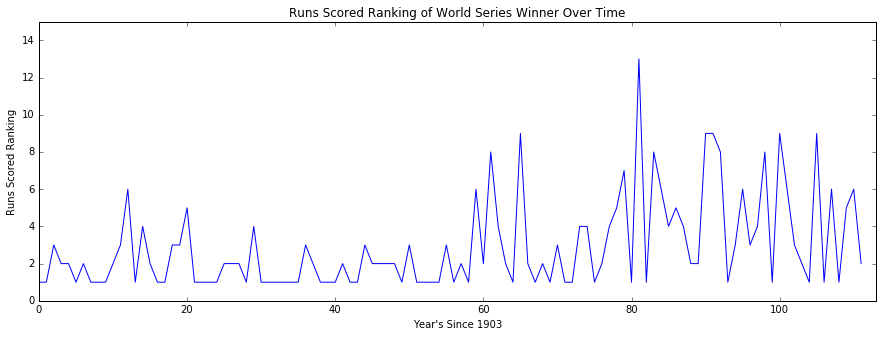

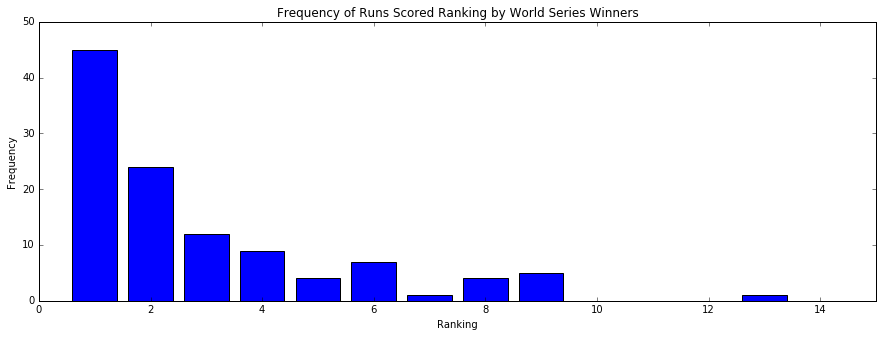

In [768]:
# m will be used as the x values
m = range(0,112)
# sets size of the figure
plt.figure(figsize=(15,5))
# plotting of the figure
plt.plot(m, RunsTableWinner6)
# x axis range
plt.xlim(0,113)
# x axis label
plt.xlabel("Year's Since 1903")
# y axis range
plt.ylim(0,15)
# y axis label
plt.ylabel('Runs Scored Ranking')
# plot title
plt.title('Runs Scored Ranking of World Series Winner Over Time')

# n will be used for x values
n = list(range(1,16))
# creates list of frequencis of each value in range(1,16)
RunsCount = []
for l in range(1,16):
    RunsCount.append(RunsTableWinner6.count(l))
# sets size of chart
plt.figure(figsize=(15,5))
# plots graph
pyplot.bar(n, RunsCount, align='center')
# x axis range
plt.xlim(0,15)
# x axis label
plt.xlabel('Ranking')
# y axis range
plt.ylim(0,50)
# y axis label
plt.ylabel('Frequency')
# plot title
plt.title('Frequency of Runs Scored Ranking by World Series Winners')
# The following cells are the exact same process but for the other data sets. 
# All explanations and code are the exact same. Only the names of variables will change.


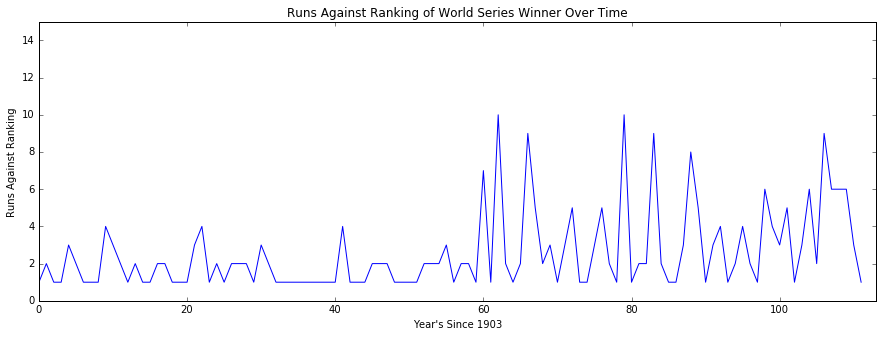

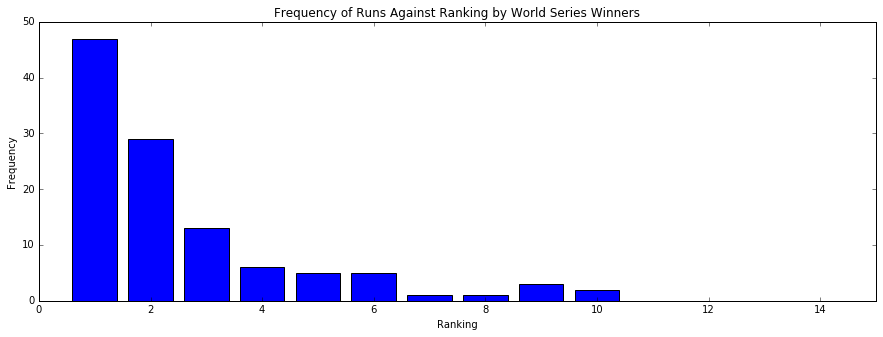

In [769]:
m = range(0,112)
plt.figure(figsize=(15,5))
plt.plot(m, RunsAgainstTableWinner6)
plt.xlim(0,113)
plt.xlabel("Year's Since 1903")
plt.ylim(0,15)
plt.ylabel('Runs Against Ranking')
plt.title('Runs Against Ranking of World Series Winner Over Time')

n = list(range(1,16))
RunsAgainstCount = []
for l in range(1,16):
    RunsAgainstCount.append(RunsAgainstTableWinner6.count(l))
plt.figure(figsize=(15,5))
pyplot.bar(n, RunsAgainstCount, align='center')
plt.xlim(0,15)
plt.xlabel('Ranking')
plt.ylim(0,50)
plt.ylabel('Frequency')
plt.title('Frequency of Runs Against Ranking by World Series Winners')




### Side note for following data

Because the variation of results in the next three data sets is much greater than the preceeding ranking, I divided all points by 10, creating "boxes" of values that fall between 2 numbers (6 is 6 and 7 for example). I continued this process for the remanding data sets, changing little but the ranges. 

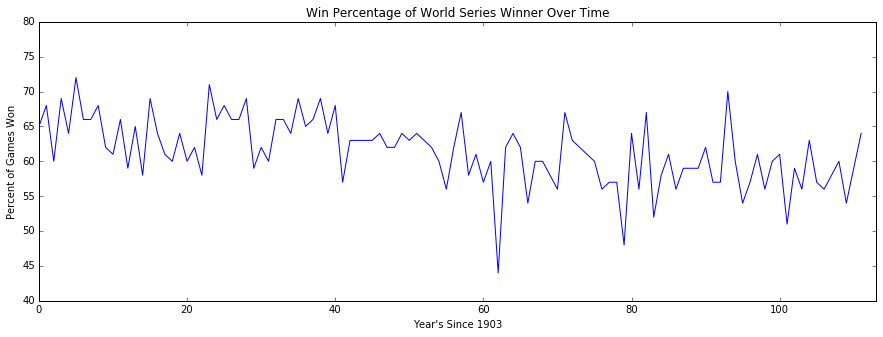

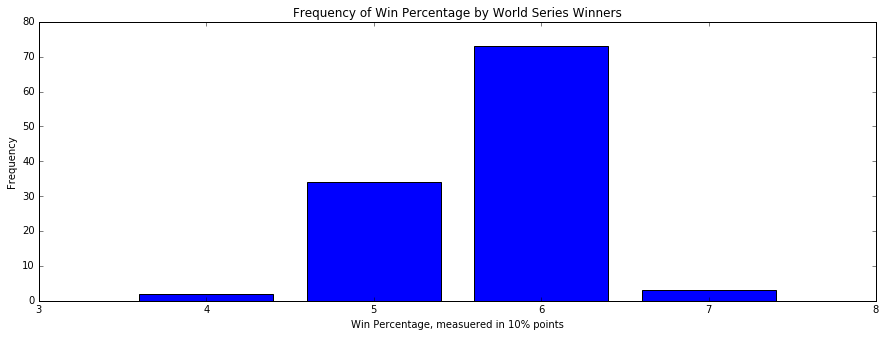

In [770]:
m = range(0,112)
plt.figure(figsize=(15,5))
plt.plot(m, WinsTableWinner6)
plt.xlim(0,113)
plt.xlabel("Year's Since 1903")
plt.ylim(40,80)
plt.ylabel('Percent of Games Won')
plt.title('Win Percentage of World Series Winner Over Time')

# Process described above
q = range(3,9)
WinsCountDivide = list((int(x/10) for x in WinsTableWinner6))
WinsCount = []
for f in range(3,9):
    WinsCount.append(WinsCountDivide.count(f))
plt.figure(figsize=(15,5))
pyplot.bar(q, WinsCount, align='center')
plt.xlim(3,8)
plt.xlabel('Win Percentage, measuered in 10% points')
plt.ylim(0,80)
plt.ylabel('Frequency')
plt.title('Frequency of Win Percentage by World Series Winners')




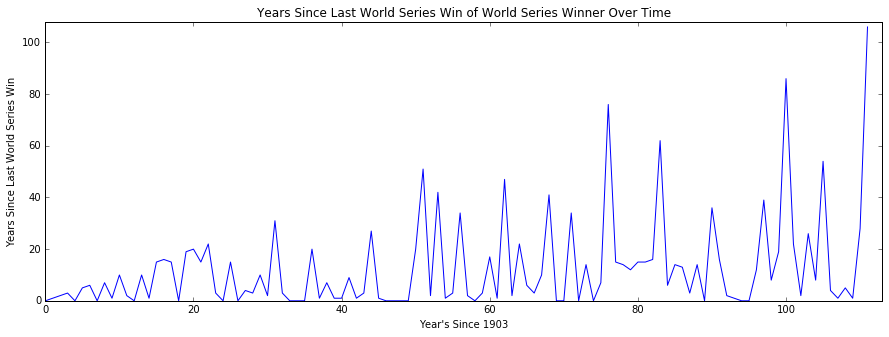

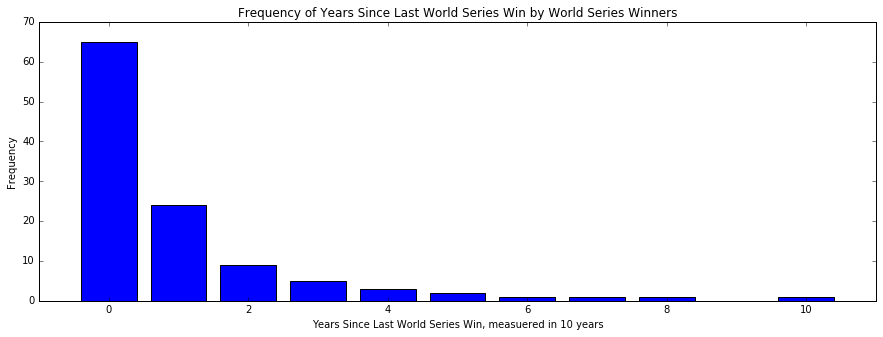

In [771]:
m = range(0,112)
plt.figure(figsize=(15,5))
plt.plot(m, LastWSTableWinner6)
plt.xlim(0,113)
plt.xlabel("Year's Since 1903")
plt.ylim(0,108)
plt.ylabel('Years Since Last World Series Win')
plt.title('Years Since Last World Series Win of World Series Winner Over Time')

t = range(0,12)
LastWSCountDivide = list((int(x/10) for x in LastWSTableWinner6))
LastWSCount = []
for f in range(0,12):
    LastWSCount.append(LastWSCountDivide.count(f))
plt.figure(figsize=(15,5))
pyplot.bar(t, LastWSCount, align='center')
plt.xlim(-1,11)
plt.xlabel('Years Since Last World Series Win, measuered in 10 years')
plt.ylim(0,70)
plt.ylabel('Frequency')
plt.title('Frequency of Years Since Last World Series Win by World Series Winners')



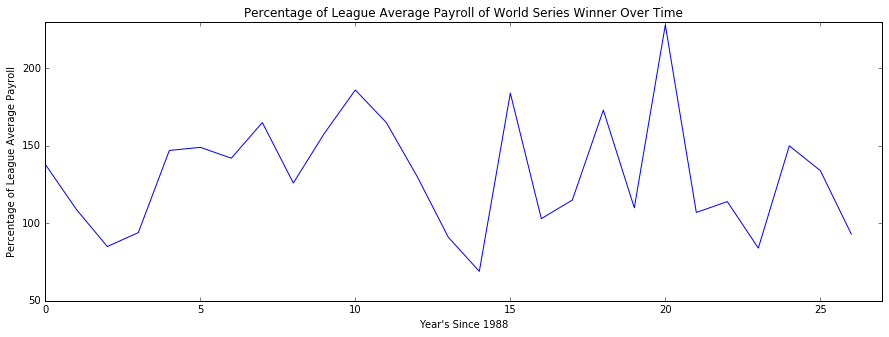

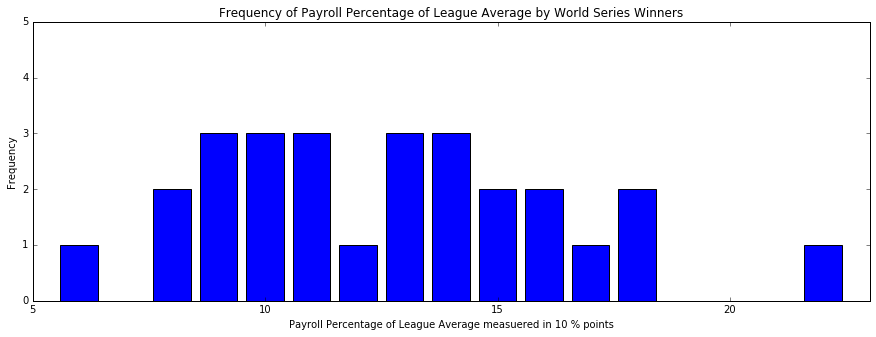

In [772]:
m = range(0,27)
plt.figure(figsize=(15,5))
plt.plot(m, PayrollTableWinner6)
plt.xlim(0,27)
plt.xlabel("Year's Since 1988")
plt.ylim(50,230)
plt.ylabel('Percentage of League Average Payroll')
plt.title('Percentage of League Average Payroll of World Series Winner Over Time')

t = range(6,23)
PayrollCountDivide = list((int(x/10) for x in PayrollTableWinner6))
PayrollCount = []
for f in range(6,23):
    PayrollCount.append(PayrollCountDivide.count(f))
plt.figure(figsize=(15,5))
pyplot.bar(t, PayrollCount, align='center')
plt.xlim(5,23)
plt.xlabel('Payroll Percentage of League Average measuered in 10 % points')
plt.ylim(0,5)
plt.ylabel('Frequency')
plt.title('Frequency of Payroll Percentage of League Average by World Series Winners')

# Analyzing the Data


## Runs Scored

Of all World Series Winners, 63% have been ranked number 1 or number 2 in runs scored. That being said, the line graph suggests that teams ranked higher have had increasingly better odds of winning as the years have passed. One possible explaination for that claim is the large expansion that occured in the 1960's. More teams simply meant there were more non 1 and 2 rankings

## Runs Scored Against 

The results for runs scored against are very similar: 68% of winners have been ranked number 1 or 2, with more variation in recent years. I thought it would be interesting to plot both graphs on the same set of axis. 




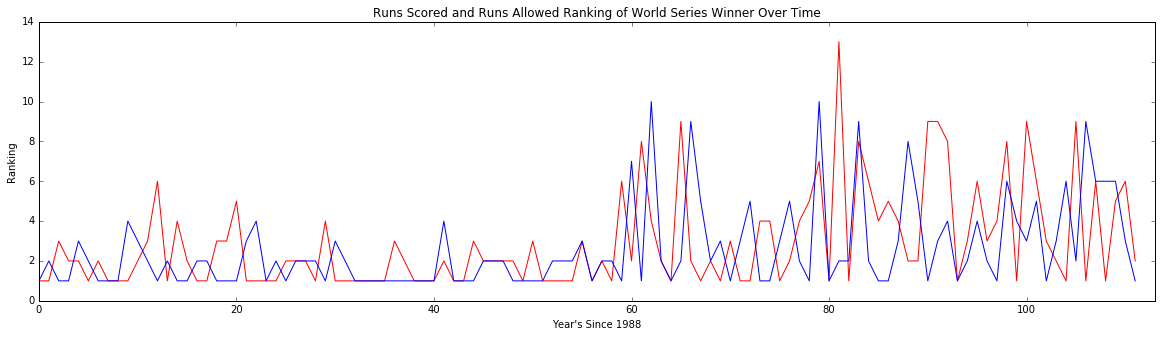

In [773]:
# plotting both lines together 
m = range(0,112)
plt.figure(figsize=(20,5))
plt.plot(m, RunsTableWinner6, 'r') # r changes the color 
plt.plot(m, RunsAgainstTableWinner6)
plt.xlim(0,113)
plt.xlabel("Year's Since 1988")
plt.ylim(0,14)
plt.ylabel('Ranking')
plt.title('Runs Scored and Runs Allowed Ranking of World Series Winner Over Time')
# Runs Scored is Red, Runs Scored Against is Blue

# Analyzing the Data


## Runs Scored and Runs Scored Against

Looking at both lines together, it appears that when one has a high ranking the other tends to be low. There are clear exceptions to that claim, but in general it appears to hold true.


## Wins

94% of winners have had a regular season win percentage between 50 and 70 and 63% have been between 60 and 70. In my opinion, these results are misleading. The season is 162 games long; so a team that wins 81 games is sitting at 50%. A team that wins 100 games has a win percentage of 62%. There tends to only be a handful of teams that win 100 games (62%) in each season. Anything  above 110 games will go down in record books: the current record for wins in a season is 116 set by the 1906 Cubs and 2001 Mariners. The win percentage for those two teams were 76% and 72% respectively (the season was 10 games shorter in 1906). Accordingly, those teams that win more games have a much greater chance of winning the world series.

The problem with this conclusion is that it's obvious and almost pointless in the context of the baseball playoff system. If chosen at random, each team has about a 3% (1/30) chance of winning the World Series. However, once qualifying for the playoffs, each time has a 13% chance of winning (1/8). Only the teams with the best record make the playoffs. So in reality, only the teams that have won more games even have a chance of winning the World Series. Accordingly, the claim that more wins results in a greater chance of a World Series win, perhaps only applies to those few teams that win significantly more than 100 games. 

## Last World Series Win

60% of World Series winners had only waited between 0 and 4 year since their last title. Logically this makes sense, players are held to contracts that can last as long as 10 years, however, 3-5 are definitely more standard lengths. So a team that is good--wins the World Series--has a better chance of being good in the future, than do teams that are not currently good. As an aside, the line graph is slightly misleading. It looks as though the values belonging to World Series winners early on were much smaller than more recent ones. That is simply because the world series started in 1903, so obviously a team that wins its first world series in 1907 will have a smaller value than a team that wins its first in 1984.  

## Payroll

Since 1988, only 15% of World Series winners have been below the average league payroll. Clearly a sample of 27 values is not ideal, but the data certainly coincides with trends seen in the game. Players make increasingly large sums of money and a new emphasis has been placed on signing free agents. Only the teams with the largest monetary backing can consistantly sign those free agents. Those teams tend to be the most popular ones as well: Yankees, Red Sox, Giants, Cardinals, etc. Not surprisingly, those teams are also the ones that have won the most World Series. Simply put, World Series wins leads to fans, which leads to monetary backing, which leads to signing free agents, which leads to World Series Wins. 



# Summary and Final Observation

After looking at the data, nothing was too surprising. The teams that perform the best during the regular season have the best chance of winning the World Series. That being said, if I were to present some sort of analytical guideline for prediction making, the following qualities would be required for a team:
    Runs Rank: 1-2
    Runs Against Rank: 1-2
        At least 1 should hold, both do not have to.
    Wins: If a team has significantly over 100 wins, choose it. 
    Years Since Last World Series: If a team has won the world series in the last 4 years, choose it. 
    Payroll: Don't choose a team that's payroll is below the league average. 
    
Although it is not a sufficient test of my recommendations, let's consider the previous 2 years. The winners were the Cubs in 2016 and the Royals in 2015. The Cubs data, in the same order as above, is as follows: 2 runs, 1 runs against, 103 wins, 106 years, and 167.4% of league average. For the Cubs 4 of my 5 guidelines worked. The data for the Royals is the following: 6, 3, 95, 28, 112%. My exact guidlines were 1 for 5 for the Royals. That being said, the team still had a solid balance of runs, runs against, and wins; they just slightly missed my cutoffs. The Royals were also an exception to typical league tendencies. They were a team of young players and only couple of big names. They caught much of the world by surprise. In fact, more and more surprising teams have emerged since the 2002 A's magical season that inspired the book and movie "Moneyball." That team threw out the idea of signing big free agents and replaced it with a montra of getting more bang for your buck: signing players to serve very specific roles. While few teams have won the World Series using this model, it has gained popularity and produced highly competitive teams. As time goes on and the game evolves further, maybe even runs, wins, and payroll wont give any insight into future World Series Winners.   